### Importing Necessaries and Getting the parameters for distributions from the Data

In [2]:
## importing the functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss; ss.set()

from model.cell import CellNode
from model.cell_utils import generateLineageWithTime, separate_pop, inG1_or_G2
from model.parameter_estimate import GAnalytical

## Reading the data
df = pd.read_excel(r'./model/G1_G2_duration_control.xlsx')

##----------------------- Preprocessing the data ------------------------##

# dataFrmae into numpy array
a = df.values
G1 = a[:, 0]
G2 = a[:, 1]

# removing nan from the array
G2 = G2[~np.isnan(G2)]

# converting from unit of [frames] into [hours]
# every frame is every 30 minutes, so dividing the numbers by 2 gives unit of [hours]
G1 = G1/2
G2 = G2/2


## Calculating the parameters of Gamma distributions
g1_a, g1_b = GAnalytical(G1)
g2_a, g2_b = GAnalytical(G2)
print('#--------- Gamma parameters for G1 and G2 ----------#')
print('\n G1: \n shape parameter: ', g1_a, 'and scale parameter is: ', g1_b)
print('\n G2: \n shape parameter: ', g2_a, 'and scale parameter is: ', g2_b)

#--------- Gamma parameters for G1 and G2 ----------#

 G1: 
 shape parameter:  9.13170441393343 and scale parameter is:  1.9456299161549493

 G2: 
 shape parameter:  15.753604883780861 and scale parameter is:  1.2695506931617295


### Generating the cell population based on the parameters and visualizing the number of cells in G1, G2, and in total.

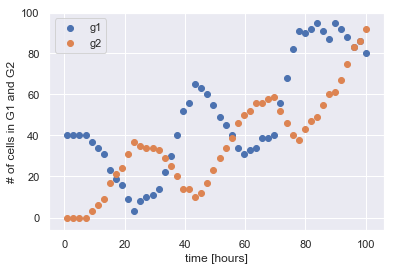

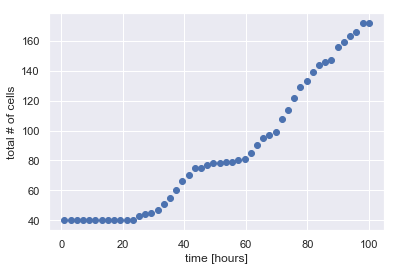

In [3]:
initCells = 40
experimentTime = 100
locBern = 0.99

# creating the lineage
lin = generateLineageWithTime(initCells, experimentTime, locBern, g1_a, g1_b, g2_a, g2_b)

# set the number of lineages as the number of intial cells we start with
num_of_lins = initCells

# separating the population in terms of their root parent
pop = separate_pop(num_of_lins, lin)

time = np.linspace(1, 100, 50)

# Determining the number of cells in G1 or G2 phase for every time point
num_g1, num_g2, num_cell = inG1_or_G2(lin, time)   

# Plotting the # of cells in G1, G2, and totall # of cells
plt.figure()
plt.scatter(time, num_g1, label = 'g1')
plt.scatter(time, num_g2, label = 'g2')
plt.ylabel('# of cells in G1 and G2')
plt.xlabel('time [hours]')
plt.legend()
plt.show()

plt.figure()
plt.scatter(time, num_cell)
plt.ylabel('total # of cells')
plt.xlabel('time [hours]')
plt.show()
